## Pandas Primer 5
--------------

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns; sns.set()
import math
import zmq
import statsmodels.api as sm
import matplotlib.pyplot as plt
import quandl as ql
ql.ApiConfig.api_key= "9Djob1GoNyL-pEK4-vEk"

<a id='cell64'></a>
## Grouping Operations

In [2]:
rows = 10000
index = pd.date_range(dt.datetime.now().date(), periods=rows, freq='H')
df15 = pd.DataFrame(np.random.standard_normal((rows, 5)),
                  columns=['No1', 'No2', 'No3', 'No4', 'No5'],
                  index=index)

In [3]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2021-03-11 00:00:00 to 2022-05-01 15:00:00
Freq: H
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     10000 non-null  float64
 1   No2     10000 non-null  float64
 2   No3     10000 non-null  float64
 3   No4     10000 non-null  float64
 4   No5     10000 non-null  float64
dtypes: float64(5)
memory usage: 468.8 KB


In [4]:
df15['Gr1'] = np.random.choice(['A', 'B', 'C', 'D'], rows)
df15.tail()

,No1,No2,No3,No4,No5,Gr1
2022-05-01 11:00:00,-0.887091,0.317920,0.297427,0.435270,0.200060,D
2022-05-01 12:00:00,-1.531707,0.374838,-0.713601,-0.058104,1.505703,C
2022-05-01 13:00:00,1.086346,0.964533,-1.071078,0.639028,-1.457191,A
2022-05-01 14:00:00,-0.165824,-0.466519,0.704171,-1.311959,-0.626384,A
2022-05-01 15:00:00,0.333544,1.586647,-0.036260,0.039532,-0.263745,D


In [5]:
grouped = df15.groupby('Gr1')

<a id='cell65'></a>

In [6]:
grouped.size()

Gr1
A    2583
B    2534
C    2478
D    2405
dtype: int64

<a id='cell66'></a>

In [7]:
grouped.sum()

,No1,No2,No3,No4,No5
Gr1,,,,,
A,29.732066,98.856340,55.955008,-53.660189,-60.077010
B,-25.671148,-41.476577,25.333973,-61.538730,-17.356354
C,69.348083,108.959591,-31.448150,82.590650,77.305324
D,-9.662849,17.885859,31.917162,76.817594,10.006910


<a id='cell67'></a>

In [8]:
grouped.describe()

No1                                                              \
      count      mean       std       min       25%       50%       75%   
Gr1                                                                       
A    2583.0  0.011511  0.977406 -3.248619 -0.659752  0.008135  0.672748   
B    2534.0 -0.010131  0.990686 -3.314078 -0.700909 -0.006688  0.684694   
C    2478.0  0.027986  0.978814 -3.439068 -0.621410  0.011024  0.711840   
D    2405.0 -0.004018  1.000550 -3.373050 -0.676120 -0.019841  0.672746   

                  No2            ...       No4               No5            \
          max   count      mean  ...       75%       max   count      mean   
Gr1                              ...                                         
A    3.332830  2583.0  0.038272  ...  0.651862  3.122054  2583.0 -0.023259   
B    3.723404  2534.0 -0.016368  ...  0.639956  4.260066  2534.0 -0.006849   
C    4.100058  2478.0  0.043971  ...  0.718899  3.607475  2478.0  0.031197   
D    3.241865  2405.0  0.007437  ...  0.710765  3.409182  2405.0  0.004161   

                                                                 
          std       min       25%       50%       75%       max  
Gr1                                                              
A    0.997826 -3.058306 -0.721647 -0.019177  0.661730  3.365736  
B    0.987110 -3.458563 -0.698538 -0.003551  0.671088  3.060335  
C    0.988573 -3.139627 -0.632950  0.048729  0.682555  3.357407  
D    0.979763 -4.681544 -0.679384 -0.000652  0.648066  3.419319  

[4 rows x 40 columns]

<a id='cell68'></a>

In [9]:
# how to select an specific group
grouped.get_group('A').head()

,No1,No2,No3,No4,No5,Gr1
2021-03-11 05:00:00,0.474727,0.138335,-0.282316,-0.857305,0.639478,A
2021-03-11 08:00:00,1.312474,-0.322464,0.587328,-1.508277,0.313230,A
2021-03-11 11:00:00,0.352732,0.656124,0.040001,0.075800,1.235152,A
2021-03-11 15:00:00,-0.334606,-0.285405,-0.454294,-1.211026,-0.378690,A
2021-03-11 17:00:00,-0.462368,0.583556,-0.162064,-0.653764,0.071646,A


<a id='cell69'></a>
### Custom agregations

In [10]:
grouped.aggregate({'No1' : np.mean,'No3' : np.std})

,No1,No3
Gr1,,
A,0.011511,0.992976
B,-0.010131,1.028365
C,0.027986,1.007530
D,-0.004018,0.997613


<a id='cell70'></a>

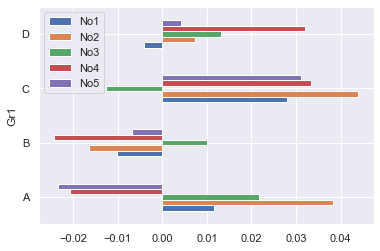

In [11]:
grouped.mean().plot(kind='barh');

In [12]:
ff = lambda x: x.hour % 2 == 0

<a id='cell71'></a>

In [13]:
df15['Gr2'] = np.where(ff(df15.index), 'even','odd')
df15.tail()

,No1,No2,No3,No4,No5,Gr1,Gr2
2022-05-01 11:00:00,-0.887091,0.317920,0.297427,0.435270,0.200060,D,odd
2022-05-01 12:00:00,-1.531707,0.374838,-0.713601,-0.058104,1.505703,C,even
2022-05-01 13:00:00,1.086346,0.964533,-1.071078,0.639028,-1.457191,A,odd
2022-05-01 14:00:00,-0.165824,-0.466519,0.704171,-1.311959,-0.626384,A,even
2022-05-01 15:00:00,0.333544,1.586647,-0.036260,0.039532,-0.263745,D,odd


### Grouping using multiple columns

In [14]:
grouped1 = df15.groupby(['Gr1','Gr2'])
grouped1.size()

Gr1  Gr2 
A    even    1306
     odd     1277
B    even    1289
     odd     1245
C    even    1231
     odd     1247
D    even    1174
     odd     1231
dtype: int64

In [15]:
grouped1.aggregate([np.min, np.mean, np.max])[['No1', 'No2']]

No1                           No2                    
              amin      mean      amax      amin      mean      amax
Gr1 Gr2                                                             
A   even -3.248619 -0.004454  3.055120 -2.853978  0.066653  3.809258
    odd  -3.231259  0.027838  3.332830 -3.217984  0.009246  3.345364
B   even -2.811541  0.014153  3.723404 -3.217616 -0.034833  3.307314
    odd  -3.314078 -0.035272  3.482096 -2.928966  0.002750  3.696453
C   even -2.649764 -0.022637  3.446009 -3.117646  0.042859  3.031052
    odd  -3.439068  0.077959  4.100058 -2.888569  0.045069  3.240064
D   even -3.276391  0.017478  3.183436 -2.852793  0.004535  3.131251
    odd  -3.373050 -0.024518  3.241865 -2.783996  0.010204  3.703055

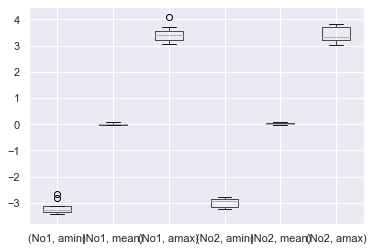

In [16]:
grouped1.aggregate([np.min, np.mean, np.max])[['No1', 'No2']].boxplot(
                    return_type='dict');

<a id='cell72'></a>

In [17]:
grouped1.filter(lambda x: np.mean(x['No2']) > 0.0).head()

,No1,No2,No3,No4,No5,Gr1,Gr2
2021-03-11 01:00:00,0.823191,0.497618,-0.634967,-0.308196,-0.194013,C,odd
2021-03-11 03:00:00,-0.855071,1.928538,0.107533,-0.310325,0.336042,C,odd
2021-03-11 04:00:00,0.719777,1.037730,-1.531390,0.809874,0.234152,C,even
2021-03-11 05:00:00,0.474727,0.138335,-0.282316,-0.857305,0.639478,A,odd
2021-03-11 06:00:00,-1.163655,0.479363,1.106447,0.449242,-0.532479,D,even
